In [1]:
import pygyre as pg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = pg.read_output('summary.h5')

In [3]:
s

E_norm,M_star,R_star,freq,l,n_g,n_p,n_pg,omega
float64,float64,float64,complex128,int32,int32,int32,int32,complex128
0.0018317902372016145,1.1930459224188302e+34,288217144968.9599,(1.2950005623520984+0j),2,13,0,-13,(0.5163977703060625+0j)
0.0016638985724553624,1.1930459224188302e+34,288217144968.9599,(1.3992636633862212+0j),2,12,0,-12,(0.5579739938726572+0j)
0.0037031970754557927,1.1930459224188302e+34,288217144968.9599,(1.5552958118189104+0j),2,11,0,-11,(0.6201937765423715+0j)
0.01597037325309638,1.1930459224188302e+34,288217144968.9599,(1.7197177495211595+0j),2,10,0,-10,(0.6857590932590126+0j)
0.014431316731893247,1.1930459224188302e+34,288217144968.9599,(1.8118944115574918+0j),2,9,0,-9,(0.7225156971815332+0j)
0.02012316440965391,1.1930459224188302e+34,288217144968.9599,(2.074883711615386+0j),2,8,0,-8,(0.8273859899925133+0j)
0.0449431728302617,1.1930459224188302e+34,288217144968.9599,(2.4381351337241894+0j),2,7,0,-7,(0.9722370656528887+0j)
0.11374069559286011,1.1930459224188302e+34,288217144968.9599,(2.6566922391636387+0j),2,6,0,-6,(1.0593894617325381+0j)
0.06056428311270461,1.1930459224188302e+34,288217144968.9599,(3.12982799132056+0j),2,5,0,-5,(1.2480582967654343+0j)


In [55]:
d = pg.read_output('detail.l2.n+1.h5')

In [56]:
c0 = 299792458
GNewton = 6.67408*10**(-11)

Rstar=s['R_star'][1] / 100
Mstar = s['M_star'][1] / 1000
M_r = d['M_r'] / 1000

rho_Dles = (d['rho'] * 10**3) * Rstar**2 * GNewton/ c0**2
M_Dles = Mstar * GNewton/ c0**2 / Rstar
Mr_Dles = M_r * GNewton/ c0**2 / Rstar

In [57]:
Rstar / (6.957 * 10 ** 8)

4.142836638909873

In [58]:
1/((rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))**(1/3)*0.5)

0.38395393486299056

In [59]:
np.trapz(4.0*(np.pi)*(d['x'])*(rho_Dles)*Mr_Dles,d['x']) / (M_Dles**2)

1.9306212671628658

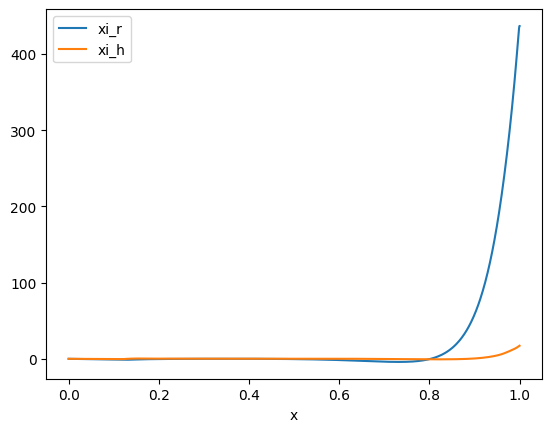

In [60]:

plt.figure()

plt.plot(d['x'], d['xi_r'].real, label='xi_r')
plt.plot(d['x'], d['xi_h'].real, label='xi_h')

plt.xlabel('x')

plt.legend()

/tmp/ipykernel_3509232/2715802805.py:11: RuntimeWarning: divide by zero encountered in divide
  d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)


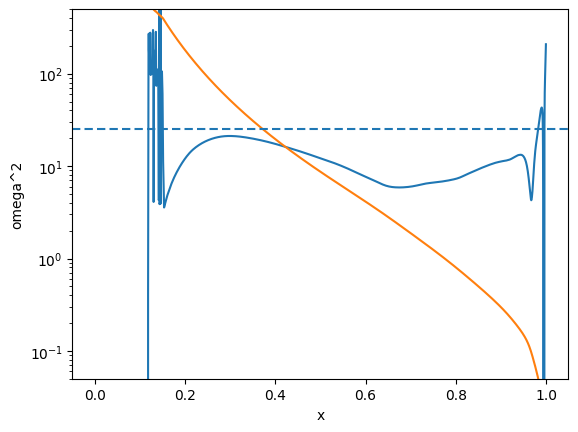

In [61]:
l = d.meta['l']
omega = d.meta['omega']

x = d['x']
V = d['V_2']*d['x']**2
As = d['As']
c_1 = d['c_1']
Gamma_1 = d['Gamma_1']

d['N2'] = d['As']/d['c_1']
d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)

# Plot the propagation diagram

plt.figure()

plt.plot(d['x'], d['N2'], label='N^2')
plt.plot(d['x'], d['Sl2'], label='S_l^2')

plt.axhline(omega.real**2, dashes=(4,2))

plt.xlabel('x')
plt.ylabel('omega^2')

plt.ylim(5e-2, 5e2)
plt.yscale('log')

In [62]:
D_overlap = np.trapz(rho_Dles *( d['x']**3 * d['xi_r'] + 3 * d['x']**2 * (d['x'] * d['xi_h'])),d['x']) / M_Dles

In [63]:
N_overlap= np.trapz(rho_Dles *( d['x']**2 * d['xi_r']**2 + 6 * (d['x'] * d['xi_h'])**2 ),d['x']) / M_Dles

In [64]:
D_overlap **2 / N_overlap

(2.30758525765335e-05+0j)